# Laboratory 4

| Name | Surname | ID Number |
|------|---------|---------------------|
| Andrea | Turci | 2106724 |

In [1]:
library(ggplot2)
library(bayestestR)
library(dplyr)
library(ggplot2)
library(geosphere)
library(spatstat)
library(Hmisc)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: spatstat.data

Loading required package: spatstat.geom

spatstat.geom 3.2-9


Attaching package: ‘spatstat.geom’


The following object is masked from ‘package:geosphere’:

    perimeter


Loading required package: spatstat.random

spatstat.random 3.2-3

Loading required package: spatstat.explore

Loading required package: nlme


Attaching package: ‘nlme’


The following object is masked from ‘package:dplyr’:

    collapse


spatstat.explore 3.2-7


Attaching package: ‘spatstat.explore’


The following object is masked from ‘package:bayestestR’:

    auc


Loading required package: spatstat.model

Loading required package: rpart

spatstat.model 3.2-11

Loading required package: spatstat.linnet

spatstat.linnet 3.1-5


spatstat 3.0-8 
For an introduction to spatst

## Exercise 1

- A well established and diffused method for detecting a disease in blood fails to detect the presence of disease in 15% of the patients that actually have the disease.
- A young UniPD startUp has developed an innovative method of screening. During the qualification phase, a random sample of n = 75 patients known to have the disease is screened using the new method.


a) What is the probability distribution of y, the number of times the new method fails to detect the disease ?


We are dealing with a Binomial distribution where $y$ is the variable:

$
P(y) = \binom{n}{y} p^y (1-p)^{n-y}
$

Making an example, with $n = 75$ and $p = 0.15$:

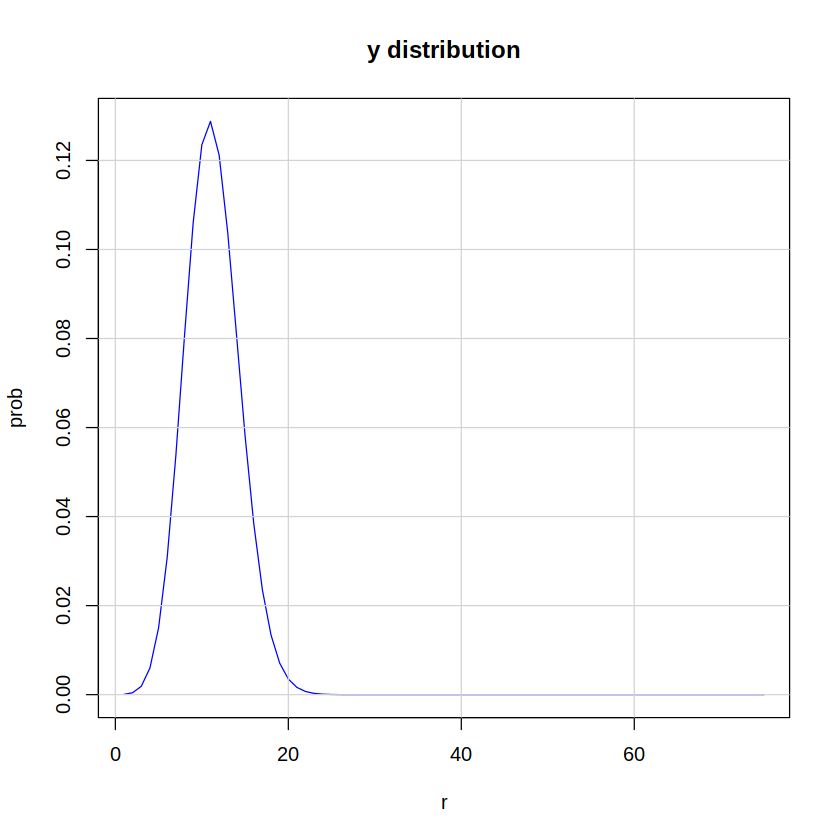

In [2]:
n <- 75
p <- 0.15

prob_binomial <- function(n, p) {
    y_values <- seq(1, n, 1)
    values <- c()
    for (y in y_values) {
        binom <- dbinom(x=y, size = n, prob = p)
        values <- append(values, binom)
    }
    return(values)
}

binom <- prob_binomial(n, p)

r <- seq(1, n, 1)

plot(r, binom, type = "l", col = "blue", xlab = "r", ylab = "prob", main = "y distribution")
grid(lty = 1)

b) On the $n = 75$ patients sample, the new method fails to detect the disease in $y = 6$ cases. What is the frequentist estimator of the failure probability of the new method ?


In [3]:
y <- 6
n <- 75

mean_freq <- 6/75
var_freq <- (p*(1-p))/n

c) Setup a bayesian computation of the posterior probability, assuming a beta distribution with mean value 0.15 and standard deviation 0.14. Plot the posterior distribution for y, and mark on the plot the mean value and variance

I compute the prior $Beta(a,b)$ given the mean and std. Then, knowing the likelihood a Binomial distribution, we end up having a posterior 

$Beta(a + y, b + n - y)$

[1] 0.08478674

[1] 0.000931017

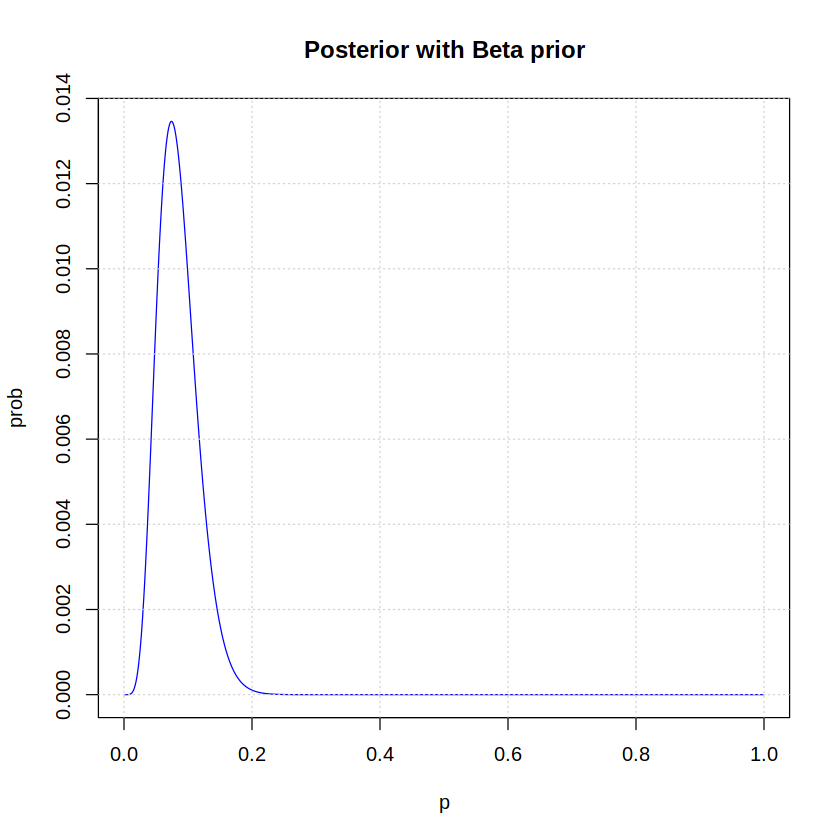

In [4]:
m <- 0.15
std <- 0.14

a <- ((1/m) - 1) * (m**3) / (std**2) - m
b <- a *((1/m) - 1)

a_prime <- a + y
b_prime <- b + n - y

p <- seq(0, 1, 0.001)
beta_post <- dbeta(p, a_prime, b_prime)

beta_post <- beta_post / sum(beta_post)

p_freq <- y/n

mean_bayes <- a_prime/(a_prime + b_prime)
variance_bayes <- (1/(n+2))**2 * n * p_freq * (1-p_freq)

mean_bayes
variance_bayes

plot(p, beta_post, type = "l", col = "blue", xlab = "p", ylab = "prob", main = "Posterior with Beta prior")
grid()

In [5]:
# STILL NEED TO PLOT THE MEAN AND VARIANCE

d) Perform a test of hypothesis assuming that if the probability of failing to the detect the desease in ill patients is greater or equal than 15%, the new test is no better that the traditional method. Test the sample at a 5% level of significance in the Bayesian way

I choose $H_0: p \geq p_0 = 0.15$ is my null hypothesis, and $\alpha = 0.05$ is chosen as level of significance. It's a one-side hypothesis test

I compute 

$
P(H_0 : p \geq p_0 | y) = \int_{p_0}^{1} g(p|y) dp
$

In [16]:
index_p0 <- which(p == 0.15)

sum_from_index_bay <- sum(beta_post[index_p0:length(beta_post)])

cat("The result", sum_from_index_bay * 100, "% is higher than alpha = 5%, therefore we can reject the null hypothesis at the 5% level of significance")

The result 3.210356 % is higher than alpha = 5%, therefore we can reject the null hypothesis at the 5% level of significance

e) Perform the same hypothesis test in the classical frequentist way.

The result 5.089685 % is higher than alpha = 5%, therefore we cannot reject the null hypothesis at the 5% level of significance

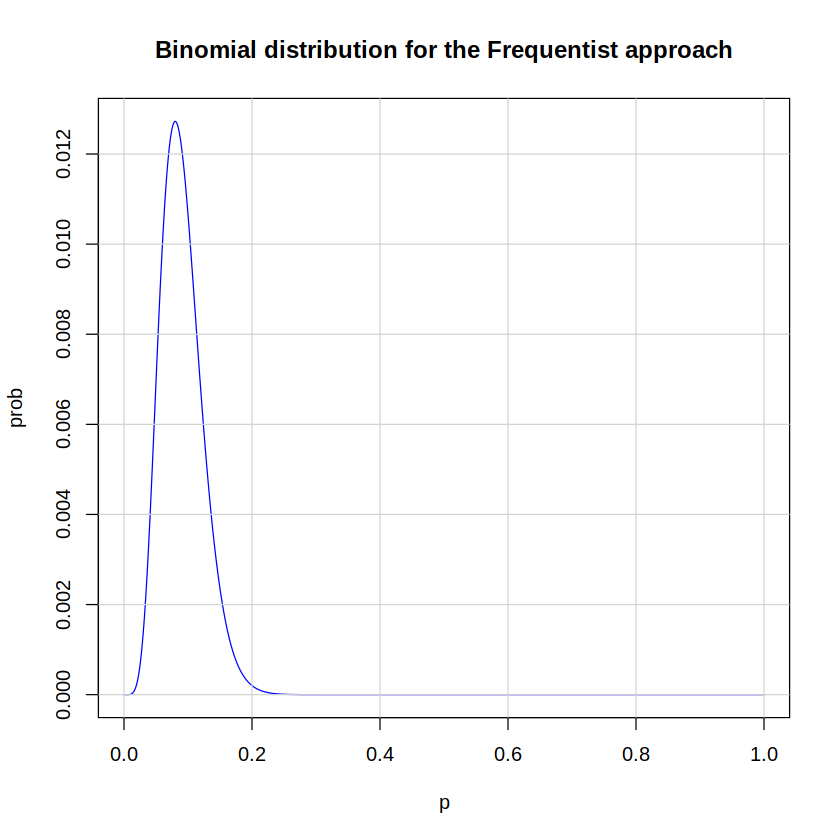

In [7]:
# Frequentist Approach

binom <- dbinom(x = y, size = n, prob = p)

binom <- binom /sum(binom)


plot(p, binom, type = "l", col = "blue", xlab = "p", ylab = "prob", main = "Binomial distribution for the Frequentist approach")
grid(lty = 1)

index_p0 <- which(p == 0.15)

sum_from_index_freq <- sum(binom[index_p0:length(binom)])

cat("The result", sum_from_index_freq * 100, "% is higher than alpha = 5%, therefore we cannot reject the null hypothesis at the 5% level of significance")

Warning message:
“Removed 700 rows containing missing values or values outside the scale range
(`geom_line()`).”
Warning message:
“Removed 700 rows containing missing values or values outside the scale range
(`geom_line()`).”


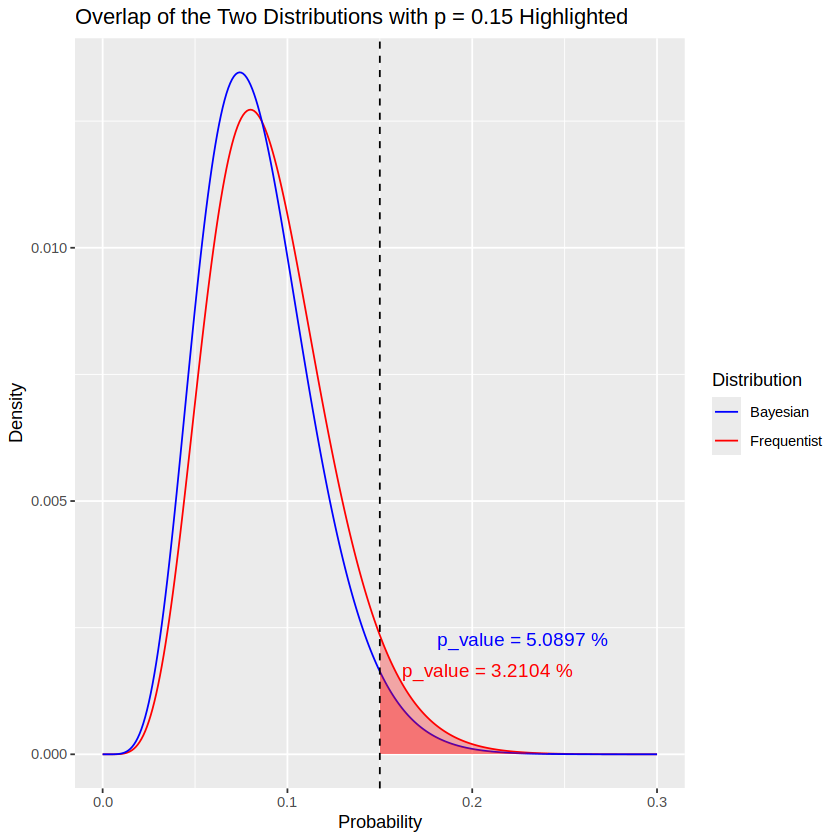

In [8]:
# Load required libraries
library(ggplot2)

# # Parameters for the binomial distributions (you will replace these with your actual parameters)
# n <- 100  # Sample size
# p1 <- 0.3  # Probability for distribution 1
# p2 <- 0.5  # Probability for distribution 2

# Generate sequence of probabilities
# probs <- seq(0, 1, length.out = 1000)

# Calculate densities for the distributions
density1 <- binom
density2 <- beta_post

# Create a data frame for plotting
df <- data.frame(p, density1, density2)

# Plot the densities with ggplot2
ggplot(df, aes(x = p)) +
  # Add density line for distribution 1
  xlim(0, 0.3) +
  geom_line(aes(y = density1, color = "Frequentist")) +
  # Add density line for distribution 2
  geom_line(aes(y = density2, color = "Bayesian")) +
  # Shade the area under the curve from p = 0.15 onwards for distribution 1
  geom_ribbon(data = subset(df, p >= 0.15), aes(ymin = 0, ymax = density1), fill = "red", alpha = 0.3) +
  # Shade the area under the curve from p = 0.15 onwards for distribution 2
  geom_ribbon(data = subset(df, p >= 0.15), aes(ymin = 0, ymax = density2), fill = "red", alpha = 0.3) +

  scale_color_manual(values = c("blue", "red")) + # set color for mean lines
  scale_fill_manual(values = c("blue", "red")) +
  geom_vline(aes(xintercept = 0.15), linetype = "dashed") + # mean lines

  # Set plot labels and title
  labs(x = "Probability", y = "Density", color = "Distribution") +
  annotate("text", x = c(sum_from_index_freq + 0.13, sum_from_index_bay + 0.13), y = c(0.0008, 0.0002), 
         label = c(sprintf("p_value = %.4f %% \n", sum_from_index_freq*100),
                   sprintf("p_value = %.4f %% \n", sum_from_index_bay*100)),
         color = c("blue", "red"), size = 4, hjust = 0, vjust = -1) + # add mean and var annotations
  ggtitle("Overlap of the Two Distributions with p = 0.15 Highlighted")


## Exercise 2

A researcher has collected $n = 16$ observations that are supposed to come from a Normal distribution with known variance $σ^2 = 4$:

4.09 4.68 1.87 2.62 5.58 8.68 4.07 4.78 

4.79 4.49 5.85 5.09 2.40 6.27 6.30 4.47

Assuming the prior is a step funtion:

$$ g(\mu)=  \left\{
\begin{array}{ll}
      \mu & 0 < \mu \leq 3 \\
      3 & 3 < \mu \leq 5 \\
      8 - \mu & 5 < \mu \leq 8 \\
      0 & \mu > 8 \\
\end{array} 
\right. $$ 

a) Find the posterior distribution, the posterior mean and standard deviation

In [9]:
var <- 4
std <- sqrt(var)

data <- c(4.09, 4.68, 1.87, 2.62, 5.58, 8.68, 4.07, 4.78, 4.79, 4.49, 5.85, 5.09, 2.40, 6.27, 6.30, 4.47)

mu <- seq(0, 10, 0.01)

In [10]:
prior <- function(mu_values) {
  values <- c()
  for (mu in mu_values) {
    if (0 < mu && mu <= 3) {
      values <- append(values, mu)
    } else if (3 < mu && mu <= 5) {
      values <- append(values, 3)
    } else if (5 < mu && mu <= 8) {
      values <- append(values, 8 - mu)
    } else {
      values <- append(values, 0)
    }
  }
  return(values)
}

In [11]:
productory <- function(mu, y_values, std) {
    prod <- 1
    for (y in y_values) {
        prod <- prod * dnorm(x = y, mean = mu, sd = std)
    }
    return(prod)
}


likelihood <- function(mu_values, y_values, std) {
    values <- c()
    for (mu in mu_values) {
      single_val <- productory(mu, y_values, std)
      values <- append(values, single_val)
    }
    return(values)
}

The mean is 4.725188 
The standard deviation is 0.4852065

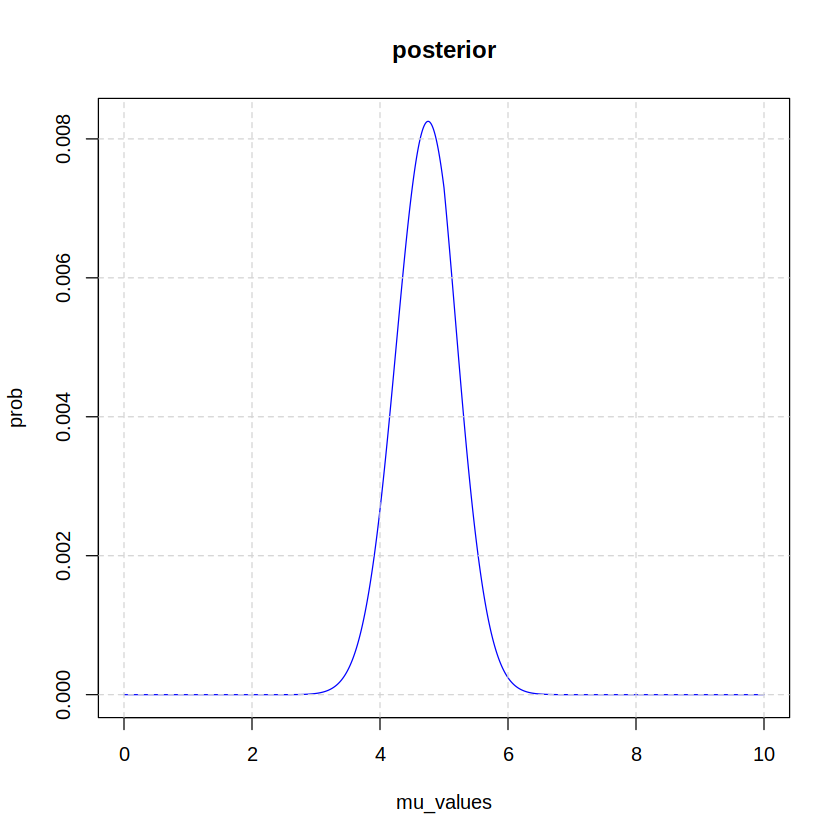

In [12]:
posterior <- function(mu_values, y_values, std, prior, likelihood) {
    pr <- prior(mu = mu_values)
    lh <- likelihood(mu_values = mu_values, y_values = y_values, std = std)
    post <- pr*lh

    post <- post / sum(post)
    return(post)
}

ps <- posterior(mu, data, std, prior, likelihood)

plot(mu, ps, type = "l", col = "blue", xlab = "mu_values", ylab = "prob", main = "posterior")
grid(lty = 2)

mean <- wtd.mean(mu, ps, normwt = TRUE)
std_dev <- sqrt(wtd.var(mu, ps, normwt = TRUE))

cat("The mean is", mean, '\n')
cat("The standard deviation is", std_dev)

b) Find the 95% credibility interval for $\mu$

95% credibility interval is ( 3.7795 ; 5.661 ) 


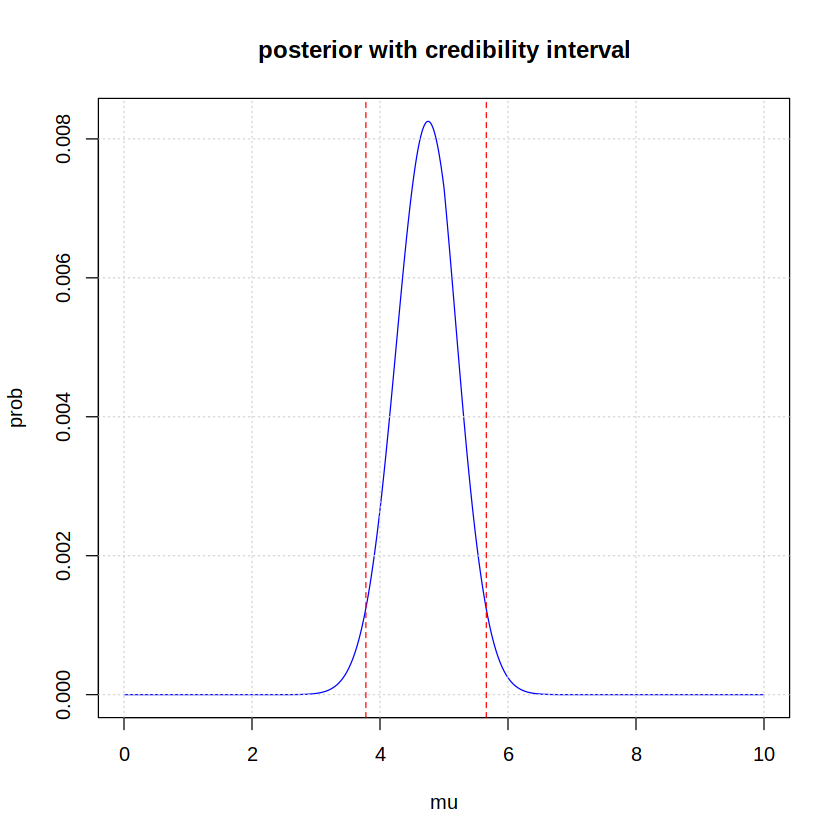

In [13]:
quantiles <- wtd.quantile(mu, ps, c(0.025, 0.975), normwt = TRUE)

cat("95% credibility interval is (", quantiles[1], ";", quantiles[2], ")", "\n")

plot(mu, ps, xlab = "mu", ylab = "prob", main ="posterior with credibility interval", col = "blue", type = "l")
grid()
abline(v = quantiles[1], col = "red", lty = 2)
abline(v = quantiles[2], col = "red", lty = 2)

c) Plot the posterior distribution, indicating on the same plot: the mean value, the standard deviation, and the 95% credibility interval


In [14]:
# STILL TO DO

d) Plot, on the same graph, the prior, the likelihood and the posterior distribution.

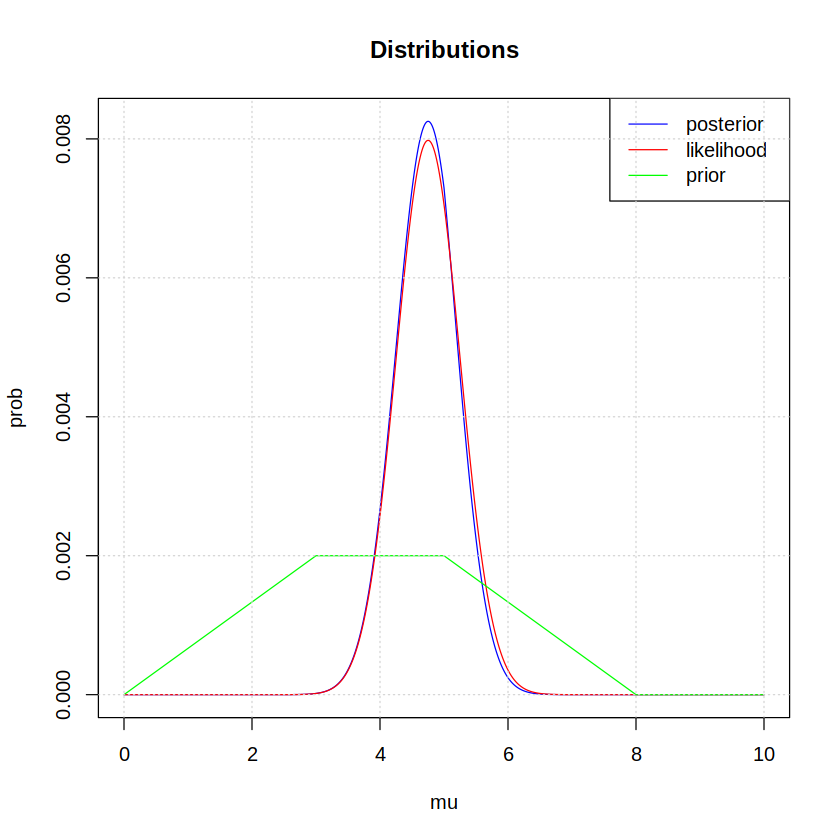

In [15]:
lh <- likelihood(mu, data, std)
lh <- lh / sum(lh)

pr <- prior(mu)
pr <- pr / sum(pr)

plot(mu, ps, xlab = "mu", ylab = "prob", main ="Distributions", col = "blue", type = "l")
lines(mu, lh, col = "red", type = "l")
lines(mu, pr, col = "green", type = "l")
legend("topright", legend = c("posterior", "likelihood","prior"),col = c("blue", "red", "green"), lty=1)
grid()

## Exercise 3 - Six Boxes Toy Model : inference

- The six boxes toy model is described in reference [1].
- Labeling the boxes as follows:

Write a program in R that:

1) Selects a random box

In [41]:
set.seed(89540)

random_number <- sample(0:5, 1)
print(random_number)

[1] 5


In [62]:
# On white

p_H_init <- 1/6
p_En_Hj <- (random_number-1)/5

n <- 14
p_H_init


list <- c()

for (i in 1:n) {
    step_n <- p_En_Hj * p_H_init
    list <- append(list, step_n)

    p_H_init <- step_n
}

list


[1] 0.1666667

[1] 0.133333333 0.106666667 0.085333333 0.068266667 0.054613333 0.043690667
 [7] 0.034952533 0.027962027 0.022369621 0.017895697 0.014316558 0.011453246
[13] 0.009162597 0.007330078